# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pandas.io.json import json_normalize

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}&appid={weather_api_key}&units={units}&q="

In [4]:
# Set up lists
lon = []
lat = []
humidity = []
temp = []
cloud = []
wind = []
country = []
date = []
city_name = []
records = 1

print("Beginning Data Retrieval")
print("------------------------")

# Loop through each city and pull the data
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response["main"]["temp"])
        humidity.append(response["main"]['humidity'])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_name.append(response["name"])
        city_record = response["name"]
        print(f"Processing Records {records} | {city_record}")
        
        records += 1
    
    except:
        print("City not found. Skipping...")
        
    pass
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Records 1 | Lebu
Processing Records 2 | Punta Arenas
Processing Records 3 | Hithadhoo
Processing Records 4 | Pevek
Processing Records 5 | Mataura
Processing Records 6 | Kiryat Gat
Processing Records 7 | Pisco
Processing Records 8 | Barrow
Processing Records 9 | Hermanus
Processing Records 10 | Asău
Processing Records 11 | Tolaga Bay
Processing Records 12 | Conde
Processing Records 13 | Kapaa
Processing Records 14 | Ibagué
Processing Records 15 | Butaritari
Processing Records 16 | Torbay
Processing Records 17 | Mwanza
City not found. Skipping...
Processing Records 18 | Cape Town
Processing Records 19 | Boden
City not found. Skipping...
Processing Records 20 | Port Alfred
Processing Records 21 | Mosquera
Processing Records 22 | Tshane
Processing Records 23 | Upernavik
Processing Records 24 | Broome
Processing Records 25 | Bluff
Processing Records 26 | Saint-Philippe
Processing Records 27 | Nicoya
Processing Records 28 | Gladsto

Processing Records 226 | Ancud
Processing Records 227 | Katsuura
Processing Records 228 | Mahébourg
Processing Records 229 | San Cristobal
Processing Records 230 | Den Helder
Processing Records 231 | Goundi
Processing Records 232 | Arawa
Processing Records 233 | Vodnyy
Processing Records 234 | Cabedelo
Processing Records 235 | Wamba
Processing Records 236 | Gigmoto
Processing Records 237 | Batagay-Alyta
Processing Records 238 | Ixtapa
City not found. Skipping...
Processing Records 239 | Gubkinskiy
Processing Records 240 | Zwedru
Processing Records 241 | Letterkenny
Processing Records 242 | São João da Barra
Processing Records 243 | Mungeli
Processing Records 244 | Bāneh
Processing Records 245 | Bathsheba
Processing Records 246 | Naples
Processing Records 247 | Hirara
Processing Records 248 | Merauke
City not found. Skipping...
Processing Records 249 | Erzin
Processing Records 250 | Rabo de Peixe
Processing Records 251 | Kudahuvadhoo
Processing Records 252 | Jinzhou
Processing Records 2

Processing Records 447 | Kineshma
Processing Records 448 | Bilma
Processing Records 449 | Kyzyl-Suu
Processing Records 450 | Portland
Processing Records 451 | Atakpamé
Processing Records 452 | Anklam
Processing Records 453 | Östersund
Processing Records 454 | Pervoye Maya
Processing Records 455 | Verkhniy Fiagdon
Processing Records 456 | Adrar
Processing Records 457 | Airai
Processing Records 458 | Constitución
Processing Records 459 | Susuman
Processing Records 460 | Leningradskiy
Processing Records 461 | Bintulu
Processing Records 462 | Nushki
City not found. Skipping...
Processing Records 463 | Brazzaville
City not found. Skipping...
Processing Records 464 | Guerrero Negro
Processing Records 465 | Grenfell
Processing Records 466 | Cap Malheureux
Processing Records 467 | Chemodanovka
City not found. Skipping...
Processing Records 468 | Uglegorsk
Processing Records 469 | Mehrān
City not found. Skipping...
Processing Records 470 | Westport
Processing Records 471 | West Wendover
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather = {
    "City": city_name,
    "Latitude": lat,
    "Longitude": lon,
    "Temperature": temp,
    "Humidity": humidity,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}

# Convert to a DataFrame
city_weather_df = pd.DataFrame(weather)
city_weather_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.62,-73.65,44.71,69,21,8.32,CL,1595545488
1,Punta Arenas,-53.15,-70.92,39.09,80,75,13.87,CL,1595545317
2,Hithadhoo,-0.60,73.08,82.96,69,85,7.63,MV,1595545488
3,Pevek,69.70,170.31,47.16,73,19,11.59,RU,1595545488
4,Mataura,-46.19,168.86,39.00,83,80,3.00,NZ,1595545488
...,...,...,...,...,...,...,...,...,...
560,Agadez,19.75,10.25,88.09,13,24,10.36,NE,1595545615
561,Abriaquí,6.63,-76.06,75.20,60,40,9.17,CO,1595545616
562,Konza,-1.74,37.13,59.00,87,75,6.93,KE,1595545616
563,Yangambi,0.81,24.43,73.31,86,99,2.08,CD,1595545616


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
humid_cities = (city_weather_df.index.values[city_weather_df["Humidity"] > 100])

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_weather_df = city_weather_df.drop(index=humid_cities, inplace=False)
clean_city_weather_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.62,-73.65,44.71,69,21,8.32,CL,1595545488
1,Punta Arenas,-53.15,-70.92,39.09,80,75,13.87,CL,1595545317
2,Hithadhoo,-0.60,73.08,82.96,69,85,7.63,MV,1595545488
3,Pevek,69.70,170.31,47.16,73,19,11.59,RU,1595545488
4,Mataura,-46.19,168.86,39.00,83,80,3.00,NZ,1595545488


In [9]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
clean_city_weather_df.to_csv("city_weather.csv", encoding="utf-8", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

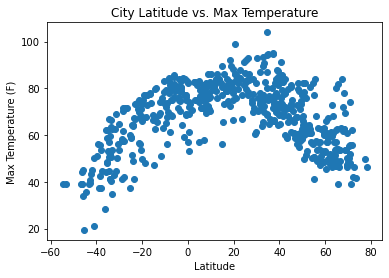

In [10]:
x_values = clean_city_weather_df["Latitude"]
y_values = clean_city_weather_df["Temperature"]
plt.scatter(x_values, y_values)


plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Images/LatvsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

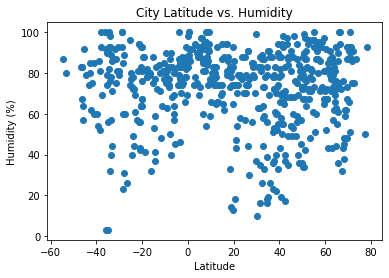

In [11]:
x_values = clean_city_weather_df["Latitude"]
y_values = clean_city_weather_df["Humidity"]
plt.scatter(x_values, y_values)


plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Images/LatvsHumid.png")
plt.show()

## Latitude vs. Cloudiness Plot

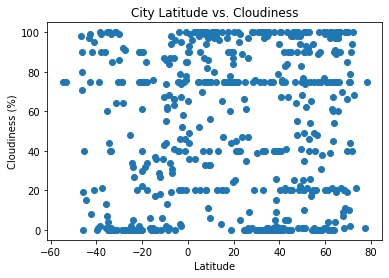

In [12]:
x_values = clean_city_weather_df["Latitude"]
y_values = clean_city_weather_df["Cloudiness"]
plt.scatter(x_values, y_values)


plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Images/LatvsCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

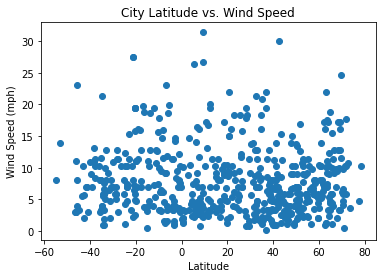

In [13]:
x_values = clean_city_weather_df["Latitude"]
y_values = clean_city_weather_df["Wind Speed"]
plt.scatter(x_values, y_values)


plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/LatvsWindSpeed.png")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def linearplt(x_values, y_values, ylabel, coordinates):
    plt.scatter(x_values, y_values)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")

    plt.xlabel("Latitude")
    plt.ylabel(ylabel)

In [15]:
# Create Northern Hemisphere DataFrame
northern_clean_city_weather_df = (city_weather_df.loc[city_weather_df["Latitude"] >= 0])
northern_clean_city_weather_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
3,Pevek,69.70,170.31,47.16,73,19,11.59,RU,1595545488
5,Kiryat Gat,31.61,34.76,73.71,63,0,2.64,IL,1595545488
7,Barrow,71.29,-156.79,39.20,93,90,10.29,US,1595545445
9,Asău,46.43,26.40,61.00,98,25,3.89,RO,1595545489
12,Kapaa,22.08,-159.32,82.17,74,75,10.29,US,1595544933


In [16]:
# Create Southern Hemisphere DataFrame
southern_clean_city_weather_df = (city_weather_df.loc[city_weather_df["Latitude"] < 0])
southern_clean_city_weather_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.62,-73.65,44.71,69,21,8.32,CL,1595545488
1,Punta Arenas,-53.15,-70.92,39.09,80,75,13.87,CL,1595545317
2,Hithadhoo,-0.60,73.08,82.96,69,85,7.63,MV,1595545488
4,Mataura,-46.19,168.86,39.00,83,80,3.00,NZ,1595545488
6,Pisco,-13.70,-76.22,65.70,72,0,12.75,PE,1595545489


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

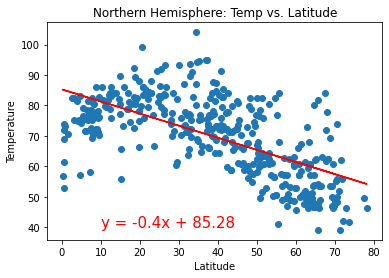

In [17]:
x_values = northern_clean_city_weather_df["Latitude"]
y_values = northern_clean_city_weather_df["Temperature"]
linearplt(x_values, y_values, "Temperature", (10,40))
plt.title("Northern Hemisphere: Temp vs. Latitude")
plt.savefig("Images/NHTempvsLat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

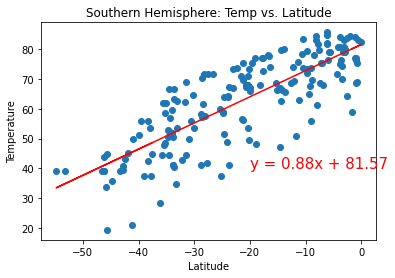

In [18]:
x_values = southern_clean_city_weather_df["Latitude"]
y_values = southern_clean_city_weather_df["Temperature"]
linearplt(x_values, y_values, "Temperature", (-20,40))
plt.title("Southern Hemisphere: Temp vs. Latitude")
plt.savefig("Images/SHTempvsLat.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

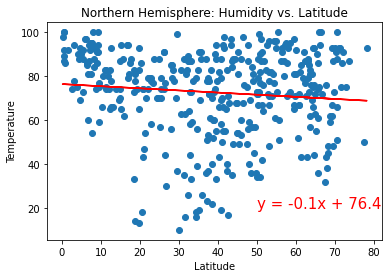

In [19]:
x_values = northern_clean_city_weather_df["Latitude"]
y_values = northern_clean_city_weather_df["Humidity"]
linearplt(x_values, y_values, "Temperature", (50,20))
plt.title("Northern Hemisphere: Humidity vs. Latitude")
plt.savefig("Images/NHHumidvsLat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

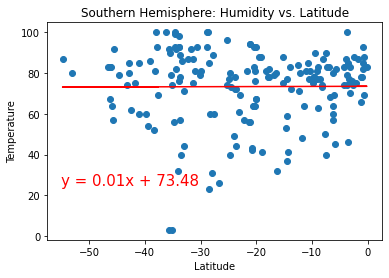

In [20]:
x_values = southern_clean_city_weather_df["Latitude"]
y_values = southern_clean_city_weather_df["Humidity"]
linearplt(x_values, y_values, "Temperature", (-55,25))
plt.title("Southern Hemisphere: Humidity vs. Latitude")
plt.savefig("Images/SHumidvsLat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

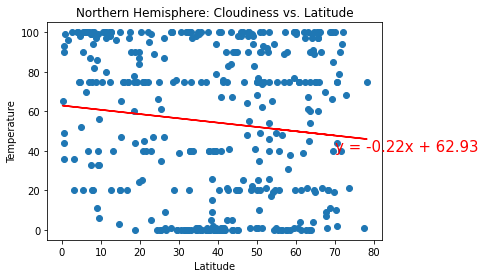

In [21]:
x_values = northern_clean_city_weather_df["Latitude"]
y_values = northern_clean_city_weather_df["Cloudiness"]
linearplt(x_values, y_values, "Temperature", (70,40))

plt.title("Northern Hemisphere: Cloudiness vs. Latitude")
plt.savefig("Images/NHCloudvsLat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

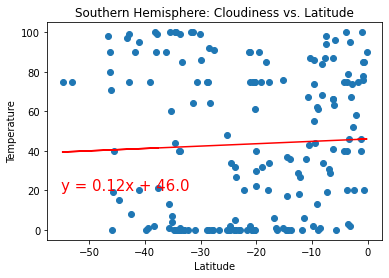

In [22]:
x_values = southern_clean_city_weather_df["Latitude"]
y_values = southern_clean_city_weather_df["Cloudiness"]
linearplt(x_values, y_values, "Temperature", (-55,20))

plt.title("Southern Hemisphere: Cloudiness vs. Latitude")
plt.savefig("Images/SHCloudvsLat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

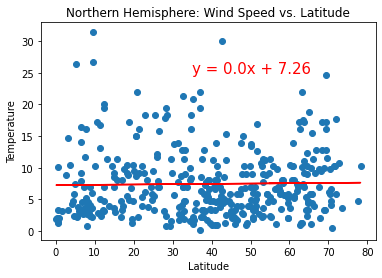

In [23]:
x_values = northern_clean_city_weather_df["Latitude"]
y_values = northern_clean_city_weather_df["Wind Speed"]
linearplt(x_values, y_values, "Temperature", (35,25))

plt.title("Northern Hemisphere: Wind Speed vs. Latitude")
plt.savefig("Images/NHWindvsLat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

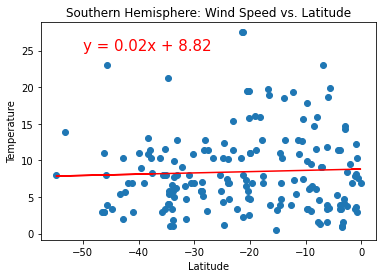

In [24]:
x_values = southern_clean_city_weather_df["Latitude"]
y_values = southern_clean_city_weather_df["Wind Speed"]
linearplt(x_values, y_values, "Temperature", (-50,25))

plt.title("Southern Hemisphere: Wind Speed vs. Latitude")
plt.savefig("Images/SHWindvsLat.png")
plt.show()